<h1> Engineering Numerical Methods, AGH UST</h1>
<h3> Author: Tymoteusz Ciesielski </h3>
<h2> Lab 3 - Solving differential equations for Van der Pol oscillator. </h2>
<h2> Control of the timestep. </h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def trapesium_count_new_step(x_n, v_n, dt, alfa):
    x_next_iter = x_n
    v_next_iter = v_n
    #desired dx and dv values to reach, stop condition
    sigma = 1e-10
    #loop modifying iteratively x and v values to be returned for the next step
    while True:
        #initialising matrix coefficients
        a1_1 = 1
        a1_2 = -dt/2 
        a2_1 = -dt/2 * (-2*alfa*x_next_iter*v_next_iter - 1)
        a2_2 = 1 - dt/2*alfa*(1 - x_next_iter**2)
        #teraz do policzenia dx i dv są nam potrzebne wartości F i G - skąd je wziąć?
        F = x_next_iter - x_n - dt/2*(v_n + v_next_iter)
        G = v_next_iter - v_n - dt/2*( alfa*(1 - x_n**2)*v_n - x_n + alfa*(1 - x_next_iter**2)*v_next_iter - x_next_iter )
        dx = (-F*a2_2 + G*a1_2)/(a1_1*a2_2 - a1_2*a2_1)
        dv = (-G*a1_1 + F*a2_1)/(a1_1*a2_2 - a1_2*a2_1)
        x_next_iter += dx
        v_next_iter += dv
        if (abs(dx) < sigma) and (abs(dv) < sigma):
            break
    return x_next_iter, v_next_iter

In [4]:
def rk2_count_new_step(x_n, v_n, dt, alfa):
    
    k1_x = v_n
    k1_v = alfa*(1 - x_n**2)*v_n - x_n
    k2_x = v_n + dt*k1_v
    k2_v = alfa*(1 - (x_n + dt*k1_x)**2)*(v_n + dt*k1_v) - (x_n + dt*k1_x)
    x_next = x_n + dt/2*(k1_x + k2_x)
    v_next = v_n + dt/2*(k1_v + k2_v)
    return x_next, v_next

<h2>1. Metoda RK2 </h2>

<h3>Solution for tolerance parameter TOL=1e-2 </h3>

In [38]:
#initialisation
x_0 = 0.01
v_0 = 0
dt = dt_0 = 1
S = 0.75
#precision level of both methods
p = 2
t_max = 40
#oscillator constant
alfa = 5
TOL = 1e-2
#algorytm rozwiazania rownania z doborem kroku czasowego
t_tab1 = np.array([dt_0])
dt_tab1 = np.array([dt_0])
x_tab1 = np.array([x_0])
v_tab1 = np.array([v_0])
#pętla 
i = 0
while True:
    #stawiamy dwa kroki dt - liczymy x i v w tej następnej chwili
    x_two_steps, v_two_steps = rk2_count_new_step(x_tab1[i], v_tab1[i], dt, alfa)
    x_two_steps, v_two_steps = rk2_count_new_step(x_two_steps, v_two_steps, dt, alfa)
    #stawiamy jeden krok 2*dt - liczymy x i v
    x_one_step, v_one_step = rk2_count_new_step(x_tab1[i], v_tab1[i], 2*dt, alfa)
    #liczymy Ex i Ev - różnica między dwoma metodami rozwiązania (?)
    E_x = (x_two_steps - x_one_step)/(2**p - 1)
    E_v = (v_two_steps - v_one_step)/(2**p - 1)
    #sprawdzamy czy wynik jest akceptowalny - czy Ex i Ev są mniejsze od przyjętej przez nas granicy TOL
    #jeśli tak - aktualizujemy wartości
    if max(abs(E_x), abs(E_v)) < TOL:
        t_tab1 = np.append(t_tab1, t_tab1[i] + 2*dt)
        x_tab1 = np.append(x_tab1, x_two_steps)
        v_tab1 = np.append(v_tab1, v_two_steps)
        dt_tab1 = np.append(dt_tab1, dt)
        i+=1
    #zmieniamy krok dt - aktualizujemy go o nową wartość, a zmiana ta następuje zawsze
    dt = ((S*TOL)/max(abs(E_x),abs(E_v)) )**(1/(p+1)) * dt
    #koniec pętli jeśli dojdziemy z czasem do t_max 
    if (t_tab1[i-1]>= t_max):
        break

<h3>Solution for tolerance parameter TOL=1e-5 </h3>

In [39]:
#initialisation
x_0 = 0.01
v_0 = 0
dt = dt_0 = 1
S = 0.75
#precision level of both methods
p = 2
t_max = 40
#oscillator constant
alfa = 5
TOL = 1e-5
#algorytm rozwiazania rownania z doborem kroku czasowego
t_tab2 = np.array([dt_0])
dt_tab2 = np.array([dt_0])
x_tab2 = np.array([x_0])
v_tab2 = np.array([v_0])
#pętla 
i = 0
while True:
    #stawiamy dwa kroki dt - liczymy x i v w tej następnej chwili
    x_two_steps, v_two_steps = rk2_count_new_step(x_tab2[i], v_tab2[i], dt, alfa)
    x_two_steps, v_two_steps = rk2_count_new_step(x_two_steps, v_two_steps, dt, alfa)
    #stawiamy jeden krok 2*dt - liczymy x i v
    x_one_step, v_one_step = rk2_count_new_step(x_tab2[i], v_tab2[i], 2*dt, alfa)
    #liczymy Ex i Ev - różnica między dwoma metodami rozwiązania (?)
    E_x = (x_two_steps - x_one_step)/(2**p - 1)
    E_v = (v_two_steps - v_one_step)/(2**p - 1)
    #sprawdzamy czy wynik jest akceptowalny - czy Ex i Ev są mniejsze od przyjętej przez nas granicy TOL
    #jeśli tak - aktualizujemy wartości
    if max(abs(E_x), abs(E_v)) < TOL:
        t_tab2 = np.append(t_tab2, t_tab2[i] + 2*dt)
        x_tab2 = np.append(x_tab2, x_two_steps)
        v_tab2 = np.append(v_tab2, v_two_steps)
        dt_tab2 = np.append(dt_tab2, dt)
        i+=1
    #zmieniamy krok dt - aktualizujemy go o nową wartość, a zmiana ta następuje zawsze
    dt = ((S*TOL)/max(abs(E_x),abs(E_v)) )**(1/(p+1)) * dt
    #koniec pętli jeśli dojdziemy z czasem do t_max 
    if (t_tab2[i-1]>= t_max):
        break

<h3> Plotting the results for RK2 method </h3>

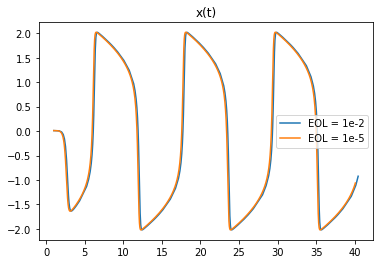

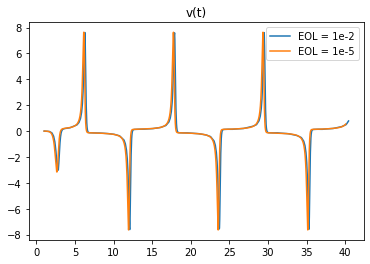

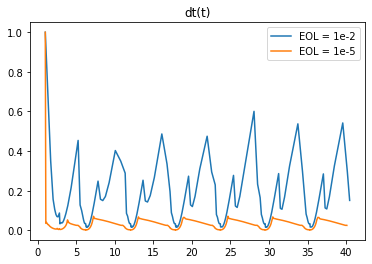

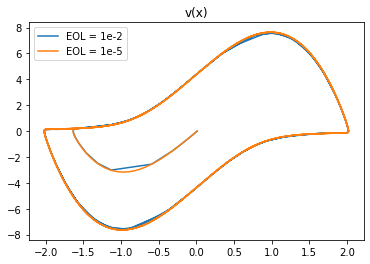

In [40]:
plt.figure(0)
plt.title(label = "x(t)")
plt.plot(t_tab1, x_tab1, label="EOL = 1e-2")
plt.plot(t_tab2, x_tab2, label="EOL = 1e-5")
plt.legend()
plt.figure(1)
plt.title(label = "v(t)")
plt.plot(t_tab1, v_tab1, label="EOL = 1e-2")
plt.plot(t_tab2, v_tab2, label="EOL = 1e-5")
plt.legend()
plt.figure(2)
plt.title(label="dt(t)")
plt.plot(t_tab1, dt_tab1, label="EOL = 1e-2")
plt.plot(t_tab2, dt_tab2, label="EOL = 1e-5")
plt.legend()
plt.figure(3)
plt.title(label = "v(x)")
plt.plot(x_tab1, v_tab1, label="EOL = 1e-2")
plt.plot(x_tab2, v_tab2, label="EOL = 1e-5")
plt.legend()

<h2>2. Metoda trapezów </h2>

<h3>Solution for tolerance parameter TOL=1e-2 </h3>

In [30]:
#initialisation
x_0 = 0.01
v_0 = 0
dt = dt_0 = 1
S = 0.75
#precision level of both methods
p = 2
t_max = 40
#oscillator constant
alfa = 5
TOL = 1e-2
#algorytm rozwiazania rownania z doborem kroku czasowego
t_tab1 = np.array([dt_0])
dt_tab1 = np.array([dt_0])
x_tab1 = np.array([x_0])
v_tab1 = np.array([v_0])
#pętla 
i = 0
while True:
    #stawiamy dwa kroki dt - liczymy x i v w tej następnej chwili
    x_two_steps, v_two_steps = trapesium_count_new_step(x_tab1[i], v_tab1[i], dt, alfa)
    x_two_steps, v_two_steps = trapesium_count_new_step(x_two_steps, v_two_steps, dt, alfa)
    #stawiamy jeden krok 2*dt - liczymy x i v
    x_one_step, v_one_step = trapesium_count_new_step(x_tab1[i], v_tab1[i], 2*dt, alfa)
    #liczymy Ex i Ev - różnica między dwoma metodami rozwiązania (?)
    E_x = (x_two_steps - x_one_step)/(2**p - 1)
    E_v = (v_two_steps - v_one_step)/(2**p - 1)
    #sprawdzamy czy wynik jest akceptowalny - czy Ex i Ev są mniejsze od przyjętej przez nas granicy TOL
    #jeśli tak - aktualizujemy wartości
    if max(abs(E_x), abs(E_v)) < TOL:
        t_tab1 = np.append(t_tab1, t_tab1[i] + 2*dt)
        x_tab1 = np.append(x_tab1, x_two_steps)
        v_tab1 = np.append(v_tab1, v_two_steps)
        dt_tab1 = np.append(dt_tab1, dt)
        i+=1
    #zmieniamy krok dt - aktualizujemy go o nową wartość, a zmiana ta następuje zawsze
    dt = ((S*TOL)/max(abs(E_x),abs(E_v)) )**(1/(p+1)) * dt
    #koniec pętli jeśli dojdziemy z czasem do t_max 
    if (t_tab1[i-1]>= t_max):
        break

<h3>Solution for tolerance parameter TOL=1e-5 </h3>

In [31]:
#initialisation
x_0 = 0.01
v_0 = 0
dt = dt_0 = 1
S = 0.75
#precision level of both methods
p = 2
t_max = 40
#oscillator constant
alfa = 5
TOL = 1e-5
#algorytm rozwiazania rownania z doborem kroku czasowego
t_tab2 = np.array([dt_0])
dt_tab2 = np.array([dt_0])
x_tab2 = np.array([x_0])
v_tab2 = np.array([v_0])
#pętla 
i = 0
while True:
    #stawiamy dwa kroki dt - liczymy x i v w tej następnej chwili
    x_two_steps, v_two_steps = trapesium_count_new_step(x_tab2[i], v_tab2[i], dt, alfa)
    x_two_steps, v_two_steps = trapesium_count_new_step(x_two_steps, v_two_steps, dt, alfa)
    #stawiamy jeden krok 2*dt - liczymy x i v
    x_one_step, v_one_step = trapesium_count_new_step(x_tab2[i], v_tab2[i], 2*dt, alfa)
    #liczymy Ex i Ev - różnica między dwoma metodami rozwiązania (?)
    E_x = (x_two_steps - x_one_step)/(2**p - 1)
    E_v = (v_two_steps - v_one_step)/(2**p - 1)
    #sprawdzamy czy wynik jest akceptowalny - czy Ex i Ev są mniejsze od przyjętej przez nas granicy TOL
    #jeśli tak - aktualizujemy wartości
    if max(abs(E_x), abs(E_v)) < TOL:
        t_tab2 = np.append(t_tab2, t_tab2[i] + 2*dt)
        x_tab2 = np.append(x_tab2, x_two_steps)
        v_tab2 = np.append(v_tab2, v_two_steps)
        dt_tab2 = np.append(dt_tab2, dt)
        i+=1
    #zmieniamy krok dt - aktualizujemy go o nową wartość, a zmiana ta następuje zawsze
    dt = ((S*TOL)/max(abs(E_x),abs(E_v)) )**(1/(p+1)) * dt
    #koniec pętli jeśli dojdziemy z czasem do t_max 
    if (t_tab2[i-1]>= t_max):
        break

<h3> Plotting the results for Trapesium method </h3>

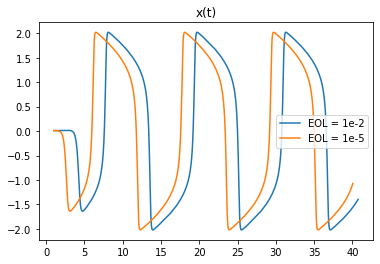

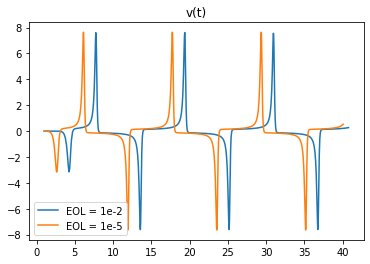

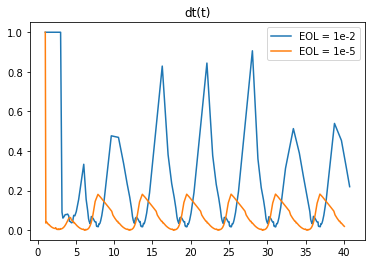

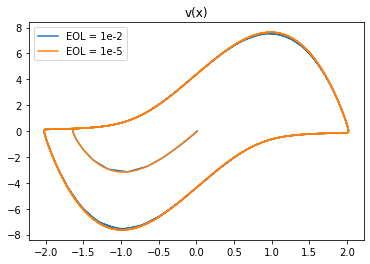

In [35]:
plt.figure(0)
plt.title(label = "x(t)")
plt.plot(t_tab1, x_tab1, label="EOL = 1e-2")
plt.plot(t_tab2, x_tab2, label="EOL = 1e-5")
plt.legend()
plt.figure(1)
plt.title(label = "v(t)")
plt.plot(t_tab1, v_tab1, label="EOL = 1e-2")
plt.plot(t_tab2, v_tab2, label="EOL = 1e-5")
plt.legend()
plt.figure(2)
plt.title(label="dt(t)")
plt.plot(t_tab1, dt_tab1, label="EOL = 1e-2")
plt.plot(t_tab2, dt_tab2, label="EOL = 1e-5")
plt.legend()
plt.figure(3)
plt.title(label = "v(x)")
plt.plot(x_tab1, v_tab1, label="EOL = 1e-2")
plt.plot(x_tab2, v_tab2, label="EOL = 1e-5")
plt.legend()